In [61]:
# ------------------------------------ Importing the libraries ---------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [62]:
# ------------------------------------ Reading the RAW CSV files --------------------------------------------------------

# Get filenames
species_filename1 = "../Data/Clean/Tern/Arctic Tern.csv"
species_filename2 = "../Data/Clean/Whale/Blue_Whale.csv"
species_filename3 = "../Data/Clean/Whale/Humpback_whale.csv"
species_filename4 = "../Data/Clean/Monarch/Monarch_clean.csv"

# Reading csv files
df_arctic_tern = pd.read_csv(species_filename1)
df_blue_whale = pd.read_csv(species_filename2)
df_humpback_whale = pd.read_csv(species_filename3)
df_monarch = pd.read_csv(species_filename4)

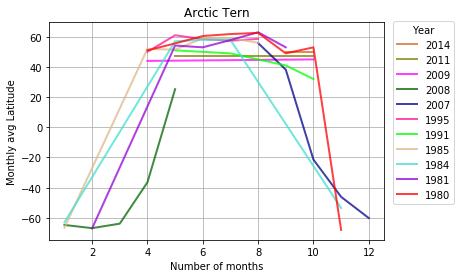

In [4]:
# ----------------------------------- EXPLORATION & ANALYSIS FOR ARCTIC TERN SPECIES --------------------------------

# Cleaning up the raw data, dropping the columns that are irrelevant
df_arctic_tern = df_arctic_tern.drop(columns=['geom','datasets','providers','num_species','csquare','geom_wkt'])

# Prepared new df with NON-NULL values of column latitude, longitude & date
arctic_adj = df_arctic_tern.dropna(subset = ['latitude','longitude','date_min'])
arctic_adj['year'] = pd.DatetimeIndex(arctic_adj['date_min']).year
arctic_adj['month']= pd.DatetimeIndex(arctic_adj['date_min']).month

# Preparing separate dataframes for each years (those are relevant & having data points)
arctic_2014 = arctic_adj.loc[arctic_adj['year'] == 2014]
arctic_2011 = arctic_adj.loc[arctic_adj['year'] == 2011]
arctic_2009 = arctic_adj.loc[arctic_adj['year'] == 2009]
arctic_2008 = arctic_adj.loc[arctic_adj['year'] == 2008]
arctic_2007 = arctic_adj.loc[arctic_adj['year'] == 2007]

arctic_1995 = arctic_adj.loc[arctic_adj['year'] == 1995]
arctic_1992 = arctic_adj.loc[arctic_adj['year'] == 1992]
arctic_1991 = arctic_adj.loc[arctic_adj['year'] == 1991]

arctic_1985 = arctic_adj.loc[arctic_adj['year'] == 1985]
arctic_1984 = arctic_adj.loc[arctic_adj['year'] == 1984]
arctic_1981 = arctic_adj.loc[arctic_adj['year'] == 1981]
arctic_1980 = arctic_adj.loc[arctic_adj['year'] == 1980]

# Calculating monthly averages of latitdue & longitude & also calculating standard error 
arctic_mean_2014 = arctic_2014.groupby(['month']).mean()
arctic_mean_2014.reset_index(drop=False,inplace=True)
arctic_std_2014 = arctic_2014.groupby(["year","month"])["latitude"].sem()

arctic_mean_2011 = arctic_2011.groupby(['month']).mean()
arctic_mean_2011.reset_index(drop=False,inplace=True)
arctic_std_2011 = arctic_2011.groupby(["year","month"])["latitude"].sem()

arctic_mean_2009 = arctic_2009.groupby(['month']).mean()
arctic_mean_2009.reset_index(drop=False,inplace=True)
arctic_std_2009 = arctic_2009.groupby(["year","month"])["latitude"].sem()


arctic_mean_2008 = arctic_2008.groupby(['month']).mean()
arctic_mean_2008.reset_index(drop=False,inplace=True)
arctic_std_2008 = arctic_2008.groupby(["year","month"])["latitude"].sem()

arctic_mean_2007 = arctic_2007.groupby(['month']).mean()
arctic_mean_2007.reset_index(drop=False,inplace=True)
arctic_std_2007 = arctic_2007.groupby(["year","month"])["latitude"].sem()

arctic_mean_1995 = arctic_1995.groupby(['month']).mean()
arctic_mean_1995.reset_index(drop=False,inplace=True)
arctic_std_1995 = arctic_1995.groupby(["year","month"])["latitude"].sem()

arctic_mean_1991 = arctic_1991.groupby(['month']).mean()
arctic_mean_1991.reset_index(drop=False,inplace=True)
arctic_std_1991 = arctic_1991.groupby(["year","month"])["latitude"].sem()

arctic_mean_1985 = arctic_1985.groupby(['month']).mean()
arctic_mean_1985.reset_index(drop=False,inplace=True)
arctic_std_1985 = arctic_1985.groupby(["year","month"])["latitude"].sem()

arctic_mean_1984 = arctic_1984.groupby(['month']).mean()
arctic_mean_1984.reset_index(drop=False,inplace=True)
arctic_std_1984 = arctic_1984.groupby(["year","month"])["latitude"].sem()

arctic_mean_1981 = arctic_1981.groupby(['month']).mean()
arctic_mean_1981.reset_index(drop=False,inplace=True)
arctic_std_1981 = arctic_1981.groupby(["year","month"])["latitude"].sem()

arctic_mean_1980 = arctic_1980.groupby(['month']).mean()
arctic_mean_1980.reset_index(drop=False,inplace=True)
arctic_std_1980 = arctic_1980.groupby(["year","month"])["latitude"].sem()

# Plotting for each year
plt.plot(arctic_mean_2014.month,arctic_mean_2014.latitude,alpha = 0.75,color = 'chocolate',linewidth=2.0,label = "2014")
plt.plot(arctic_mean_2011.month,arctic_mean_2011.latitude,alpha = 0.75,color = 'olive',linewidth=2.0,label = "2011")
plt.plot(arctic_mean_2009.month,arctic_mean_2009.latitude,alpha = 0.75,color = 'fuchsia',linewidth=2.0,label = "2009")
plt.plot(arctic_mean_2008.month,arctic_mean_2008.latitude,alpha = 0.75,color = 'darkgreen',linewidth=2.0,label = "2008")
plt.plot(arctic_mean_2007.month,arctic_mean_2007.latitude,alpha = 0.75,color = 'darkblue',linewidth=2.0,label = "2007")
plt.plot(arctic_mean_1995.month,arctic_mean_1995.latitude,alpha = 0.75,color = 'deeppink',linewidth=2.0,label = "1995")
plt.plot(arctic_mean_1991.month,arctic_mean_1991.latitude,alpha = 0.75,color = 'lime',linewidth=2.0,label = "1991")
plt.plot(arctic_mean_1985.month,arctic_mean_1985.latitude,alpha = 0.75,color = 'burlywood',linewidth=2.0,label = "1985")
plt.plot(arctic_mean_1984.month,arctic_mean_1984.latitude,alpha = 0.75,color = 'turquoise',linewidth=2.0,label = "1984")
plt.plot(arctic_mean_1981.month,arctic_mean_1981.latitude,alpha = 0.75,color = 'darkviolet',linewidth=2.0,label = "1981")
plt.plot(arctic_mean_1980.month,arctic_mean_1980.latitude,alpha = 0.75,color = 'red',linewidth=2.0,label = "1980")

plt.xlabel("Number of months")
plt.ylabel("Monthly avg Latitude")
plt.title("Arctic Tern")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.savefig("./Output/Arctic_Tern_Months Vs Mean_Lat.png" , pad_inches=1, bbox_inches= 'tight')
plt.show()

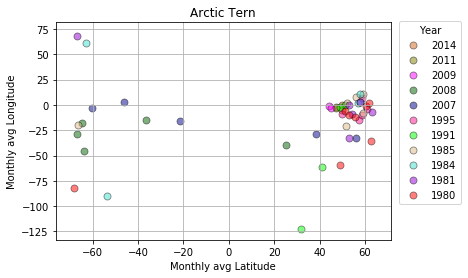

In [5]:
# scatter plot latitude & longitude for various years
plt.scatter(arctic_mean_2014.latitude,arctic_mean_2014.longitude,s=50, alpha = 0.5,color = 'chocolate',edgecolor = 'black',linewidth=0.75, label="2014")
plt.scatter(arctic_mean_2011.latitude,arctic_mean_2011.longitude,s=50, alpha = 0.5,color = 'olive',edgecolor = 'black',linewidth=0.75, label="2011")
plt.scatter(arctic_mean_2009.latitude,arctic_mean_2009.longitude,s=50, alpha = 0.5,color = 'fuchsia',edgecolor = 'black',linewidth=0.75, label="2009")
plt.scatter(arctic_mean_2008.latitude,arctic_mean_2008.longitude,s=50, alpha = 0.5,color = 'darkgreen',edgecolor = 'black',linewidth=0.75, label="2008")
plt.scatter(arctic_mean_2007.latitude,arctic_mean_2007.longitude,s=50, alpha = 0.5,color = 'darkblue',edgecolor = 'black',linewidth=0.75, label="2007")
plt.scatter(arctic_mean_1995.latitude,arctic_mean_1995.longitude,s=50, alpha = 0.5,color = 'deeppink',edgecolor = 'black',linewidth=0.75, label="1995")
plt.scatter(arctic_mean_1991.latitude,arctic_mean_1991.longitude,s=50, alpha = 0.5,color = 'lime',edgecolor = 'black',linewidth=0.75, label="1991")
plt.scatter(arctic_mean_1985.latitude,arctic_mean_1985.longitude,s=50, alpha = 0.5,color = 'burlywood',edgecolor = 'black',linewidth=0.75, label="1985")
plt.scatter(arctic_mean_1984.latitude,arctic_mean_1984.longitude,s=50, alpha = 0.5,color = 'turquoise',edgecolor = 'black',linewidth=0.75, label="1984")
plt.scatter(arctic_mean_1981.latitude,arctic_mean_1981.longitude,s=50, alpha = 0.5,color = 'darkviolet',edgecolor = 'black',linewidth=0.75, label="1981")
plt.scatter(arctic_mean_1980.latitude,arctic_mean_1980.longitude,s=50, alpha = 0.5,color = 'red',edgecolor = 'black',linewidth=0.75, label="1980")

plt.xlabel("Monthly avg Latitude")
plt.ylabel("Monthly avg Longitude")
plt.title("Arctic Tern")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.savefig("./Output/Arctic_Tern_Mean Lat Vs Mean_Lng.png", pad_inches=1, bbox_inches= 'tight')
plt.show()

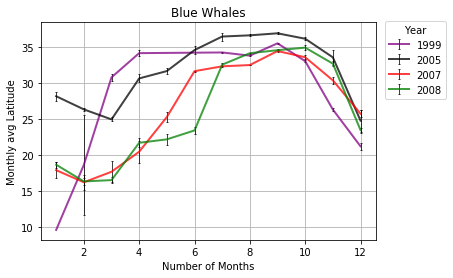

In [6]:
# ----------------------------------- EXPLORATION & ANALYSIS FOR BLUE WHALE SPECIES --------------------------------

# Cleaning up the raw data, dropping the columns that are irrelevant & renaming columns to better understanding
df_blue_whale['Date'], df_blue_whale['Time'] = zip(*df_blue_whale.timestamp.str.split())
df_blue_whale = df_blue_whale.drop(columns=['timestamp'])
df_blue_whale['year'] = pd.DatetimeIndex(df_blue_whale['Date']).year
df_blue_whale['month'] = pd.DatetimeIndex(df_blue_whale['Date']).month

df_blue_whale = df_blue_whale.rename(columns={"location-lat":"latitude","location-long":"longitude"})
df_blue_whale = df_blue_whale.dropna(subset = ['latitude','longitude','Date'])

# Preparing separate dataframes for each years (those are relevant & having data points)
blue_whale_1999 = df_blue_whale.loc[df_blue_whale['year'] == 1999]
blue_whale_2005 = df_blue_whale.loc[df_blue_whale['year'] == 2005]
blue_whale_2007 = df_blue_whale.loc[df_blue_whale['year'] == 2007]
blue_whale_2008 = df_blue_whale.loc[df_blue_whale['year'] == 2008]

# Calculating monthly averages of latitdue & longitude & also calculating standard error 
bw_lat_mean_1999 = blue_whale_1999.groupby(['month']).mean()
bw_lat_mean_1999.reset_index(drop=False,inplace=True)
bw_lat_std_1999 = blue_whale_1999.groupby(["year","month"])["latitude"].sem()

bw_lat_mean_2005 = blue_whale_2005.groupby(['month']).mean()
bw_lat_mean_2005.reset_index(drop=False,inplace=True)
bw_lat_std_2005 = blue_whale_2005.groupby(["year","month"])["latitude"].sem()

bw_lat_mean_2007 = blue_whale_2007.groupby(['month']).mean()
bw_lat_mean_2007.reset_index(drop=False,inplace=True)
bw_lat_std_2007 = blue_whale_2007.groupby(["year","month"])["latitude"].sem()

bw_lat_mean_2008 = blue_whale_2008.groupby(['month']).mean()
bw_lat_mean_2008.reset_index(drop=False,inplace=True)
bw_lat_std_2008 = blue_whale_2008.groupby(["year","month"])["latitude"].sem()


# Plotting the error bar for each year
plt.errorbar(bw_lat_mean_1999.month,bw_lat_mean_1999.latitude,yerr=bw_lat_std_1999,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'purple',linewidth=2.0,label="1999")
plt.errorbar(bw_lat_mean_2005.month,bw_lat_mean_2005.latitude,yerr=bw_lat_std_2005,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'black',linewidth=2.0,label="2005")
plt.errorbar(bw_lat_mean_2005.month,bw_lat_mean_2007.latitude,yerr=bw_lat_std_2007,ecolor='black',capsize=1,elinewidth=1, alpha = 0.75,color = 'red',linewidth=2.0,label="2007")
plt.errorbar(bw_lat_mean_2008.month,bw_lat_mean_2008.latitude,yerr=bw_lat_std_2008,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'green',linewidth=2.0,label="2008")
plt.xlabel("Number of Months")
plt.ylabel("Monthly avg Latitude")
plt.title("Blue Whales")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.savefig("./Output/Blue_Whale_Months Vs Mean_Lat.png", pad_inches=1, bbox_inches= 'tight')
plt.show()

In [7]:
# Plotting the data for Blue whale on gmaps
fig = gmaps.figure()

bw_df_1999 = pd.DataFrame({"Avg latitude": bw_lat_mean_1999["latitude"],
                           "Avg longitude":bw_lat_mean_1999["longitude"] })
bw_df_2005 = pd.DataFrame({"Avg latitude": bw_lat_mean_2005["latitude"],
                           "Avg longitude":bw_lat_mean_2005["longitude"] })
bw_df_2007 = pd.DataFrame({"Avg latitude": bw_lat_mean_2007["latitude"],
                           "Avg longitude":bw_lat_mean_2007["longitude"] })
bw_df_2008 = pd.DataFrame({"Avg latitude": bw_lat_mean_2008["latitude"],
                           "Avg longitude":bw_lat_mean_2008["longitude"] })

# Creating tuple of latitude & longitude for plotting on gmaps
bw_cord1999 =[]
for lat, lng in bw_df_1999.itertuples(index=False):
   bw_cord1999.append([lat,lng])
bw_cord2005 =[]
for lat, lng in bw_df_2005.itertuples(index=False):
   bw_cord2005.append([lat,lng])
bw_cord2007 =[]
for lat, lng in bw_df_2007.itertuples(index=False):
   bw_cord2007.append([lat,lng])
bw_cord2008 =[]
for lat, lng in bw_df_2008.itertuples(index=False):
   bw_cord2008.append([lat,lng])

bw_mrk1999 = gmaps.symbol_layer(bw_cord1999,fill_color='white', stroke_color='green', scale=4)
bw_mrk2005 = gmaps.symbol_layer(bw_cord2005,fill_color='white', stroke_color='purple', scale=4)
bw_mrk2007 = gmaps.symbol_layer(bw_cord2007,fill_color='white', stroke_color='red', scale=4)
bw_mrk2008 = gmaps.symbol_layer(bw_cord2008,fill_color='white', stroke_color='black', scale=4)
fig.add_layer(bw_mrk1999)
fig.add_layer(bw_mrk2005)
fig.add_layer(bw_mrk2007)
fig.add_layer(bw_mrk2008)
fig

Figure(layout=FigureLayout(height='420px'))

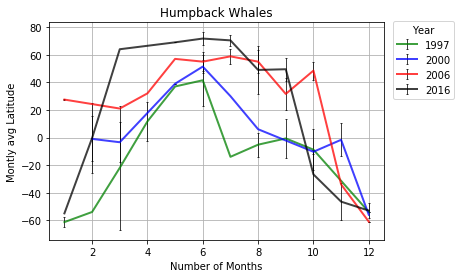

In [8]:
# ----------------------------------- EXPLORATION & ANALYSIS FOR HUMPBACK WHALE SPECIES --------------------------------

# Cleaning up the raw data, dropping the columns that are irrelevant & renaming columns to better understanding
df_humpback_whale = df_humpback_whale.drop(columns=['geom','geom_wkt','providers','csquare'])
df_humpback_whale = df_humpback_whale.rename(columns={"oid":"Ocean id"})
df_humpback_whale = df_humpback_whale.dropna(subset = ['latitude','longitude','date_min'])
df_humpback_whale['year'] = pd.DatetimeIndex(df_humpback_whale['date_min']).year
df_humpback_whale['month']= pd.DatetimeIndex(df_humpback_whale['date_min']).month
df_humpback_whale =df_humpback_whale.dropna(how='any')

# Preparing separate dataframes for each years (those are relevant & having data points)
humpback_1992 = df_humpback_whale.loc[df_humpback_whale['year'] == 1992]
humpback_1997 = df_humpback_whale.loc[df_humpback_whale['year'] == 1997]
humpback_2000 = df_humpback_whale.loc[df_humpback_whale['year'] == 2000]
humpback_2006 = df_humpback_whale.loc[df_humpback_whale['year'] == 2006]
humpback_2016 = df_humpback_whale.loc[df_humpback_whale['year'] == 2016]

# Calculating monthly averages of latitdue & longitude & also calculating standard error
hw_lat_mean_1997 = humpback_1997.groupby(['month']).mean()
hw_lat_mean_1997.reset_index(drop=False,inplace=True)
hw_lat_std_1997 = humpback_1997.groupby(["year","month"])["latitude"].sem()

hw_lat_mean_2000 = humpback_2000.groupby(['month']).mean()
hw_lat_mean_2000.reset_index(drop=False,inplace=True)
hw_lat_std_2000 = humpback_2000.groupby(["year","month"])["latitude"].sem()

hw_lat_mean_2006 = humpback_2006.groupby(['month']).mean()
hw_lat_mean_2006.reset_index(drop=False,inplace=True)
hw_lat_std_2006 = humpback_2006.groupby(["year","month"])["latitude"].sem()

hw_lat_mean_2016 = humpback_2016.groupby(['month']).mean()
hw_lat_mean_2016.reset_index(drop=False,inplace=True)
hw_lat_std_2016 = humpback_2016.groupby(["year","month"])["latitude"].sem()

 # Plotting the error bar for each year
plt.errorbar(hw_lat_mean_1997.month,hw_lat_mean_1997.latitude,yerr=hw_lat_std_1997,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'green',linewidth=2.0,label = "1997")
plt.errorbar(hw_lat_mean_2000.month,hw_lat_mean_2000.latitude,yerr=hw_lat_std_2000,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'blue',linewidth=2.0,label = "2000")
plt.errorbar(hw_lat_mean_2006.month,hw_lat_mean_2006.latitude,yerr=hw_lat_std_2006,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'red',linewidth=2.0,label = "2006")
plt.errorbar(hw_lat_mean_2016.month,hw_lat_mean_2016.latitude,yerr=hw_lat_std_2016,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'black',linewidth=2.0,label = "2016")
plt.xlabel("Number of Months")
plt.ylabel("Montly avg Latitude")
plt.title("Humpback Whales")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.savefig("./Output/Humpback_Whales_Months Vs Mean_Lat.png", pad_inches=1, bbox_inches= 'tight')
plt.show()

In [9]:
# Plotting the data for humpback whale on gmaps

hw_df_1997 = pd.DataFrame({"Avg latitude": hw_lat_mean_1997["latitude"],
                           "Avg longitude":hw_lat_mean_1997["longitude"] })
hw_df_2000 = pd.DataFrame({"Avg latitude": hw_lat_mean_2000["latitude"],
                           "Avg longitude":hw_lat_mean_2000["longitude"] })
hw_df_2006 = pd.DataFrame({"Avg latitude": hw_lat_mean_2006["latitude"],
                           "Avg longitude":hw_lat_mean_2006["longitude"] })
hw_df_2016 = pd.DataFrame({"Avg latitude": hw_lat_mean_2016["latitude"],
                           "Avg longitude":hw_lat_mean_2016["longitude"]})

hw_cord1997 =[]
for lat, lng in hw_df_1997.itertuples(index=False):
   hw_cord1997.append([lat,lng])
hw_cord2000 =[]
for lat, lng in hw_df_2000.itertuples(index=False):
   hw_cord2000.append([lat,lng])
hw_cord2006 =[]
for lat, lng in hw_df_2006.itertuples(index=False):
   hw_cord2006.append([lat,lng])
hw_cord2016 =[]
for lat, lng in hw_df_2016.itertuples(index=False):
   hw_cord2016.append([lat,lng])

hw_mrk1997 = gmaps.symbol_layer(hw_cord1997,fill_color='white', stroke_color='green', scale=4)
hw_mrk2000 = gmaps.symbol_layer(hw_cord2000,fill_color='white', stroke_color='purple', scale=4)
hw_mrk2006 = gmaps.symbol_layer(hw_cord2006,fill_color='white', stroke_color='red', scale=4)
hw_mrk2016 = gmaps.symbol_layer(hw_cord2016,fill_color='white', stroke_color='black', scale=4)
fig.add_layer(hw_mrk1997)
fig.add_layer(hw_mrk2000)
fig.add_layer(hw_mrk2006)
fig.add_layer(hw_mrk2016)
fig

Figure(layout=FigureLayout(height='420px'))

C:\Users\Bashira\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bashira\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


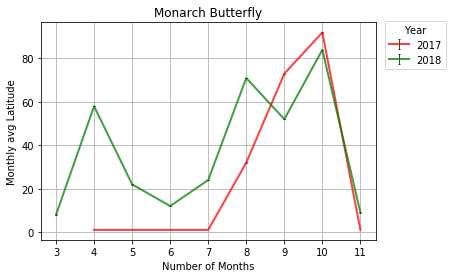

In [74]:
# ----------------------------------- EXPLORATION & ANALYSIS FOR MONARCH BUTTERFLY SPECIES --------------------------------

# Cleaning up the raw data, dropping the columns that are irrelevant & renaming columns to better understanding
monarch_adj = df_monarch.dropna(subset = ['latitude','longitude','observed_on']) 
monarch_adj['year'] = pd.DatetimeIndex(monarch_adj['observed_on']).year 
monarch_adj['month']= pd.DatetimeIndex(monarch_adj['observed_on']).month 

# Preparing separate dataframes for each years (those are relevant & having data points)
monarch_2017 = monarch_adj.loc[monarch_adj['year'] == 2017] 
monarch_2018 = monarch_adj.loc[monarch_adj['year'] == 2018]

# Calculating monthly average & monthly count of latitdue & also calculating standard error

mn_lat_mean_2017 = monarch_2017.groupby(['month']).count()
mn_lat_mean_2017.reset_index(drop=False,inplace=True)
mn_lat_std_2017 = monarch_2017.groupby(["year","month"])["latitude"].sem()

mn_lat_mean_2018 = monarch_2018.groupby(['month']).count()
mn_lat_mean_2018.reset_index(drop=False,inplace=True)
mn_lat_std_2018 = monarch_2018.groupby(["year","month"])["latitude"].sem()

plt.errorbar(mn_lat_mean_2017.month,mn_lat_mean_2017.latitude,yerr=mn_lat_std_2017,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'red',linewidth=2.0,label = "2017")
plt.errorbar(mn_lat_mean_2018.month,mn_lat_mean_2018.latitude,yerr=mn_lat_std_2018,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'green',linewidth=2.0,label = "2018")
plt.xlabel("Number of Months")
plt.ylabel("Monthly avg Latitude")
plt.title("Monarch Butterfly")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.savefig("./Output/Monarch_Butterfly_Months Vs Mean_Lat.png", pad_inches=1, bbox_inches= 'tight')
plt.show()